In [1]:
import pandas as pd

In [2]:
# reading our raw data as a dataframe 
data = pd.read_csv('data.csv')

In [3]:
# looking at the dimensions of raw data
data.shape # data has 569 rows and 32 columns

(569, 33)

In [4]:
# looking at first few rows of our raw data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# dropping useless Unnamed:32 column as it will not be required in further analysis
data.drop('Unnamed: 32', axis=1, inplace=True)

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# check number of benign and malignant tumors
# using value_counts() method on the diagnosis column of our dataset
no_of_benign = data.diagnosis.value_counts()['B']
no_of_malignant = data.diagnosis.value_counts()['M']
print('Number of benign samples: ', no_of_benign)
print('Number of malignant samples: ', no_of_malignant)


Number of benign samples:  357
Number of malignant samples:  212


In [8]:
# finding correlation between each of the features
# removing the id column and the target i.e. dagnosis column before finding correlation
# because we only need to check correlation between the independent features, therefore excluding the id and diagnosis
data_for_corr = data.drop(['id','diagnosis'], axis = 'columns')
corr_matrix = data_for_corr.corr()

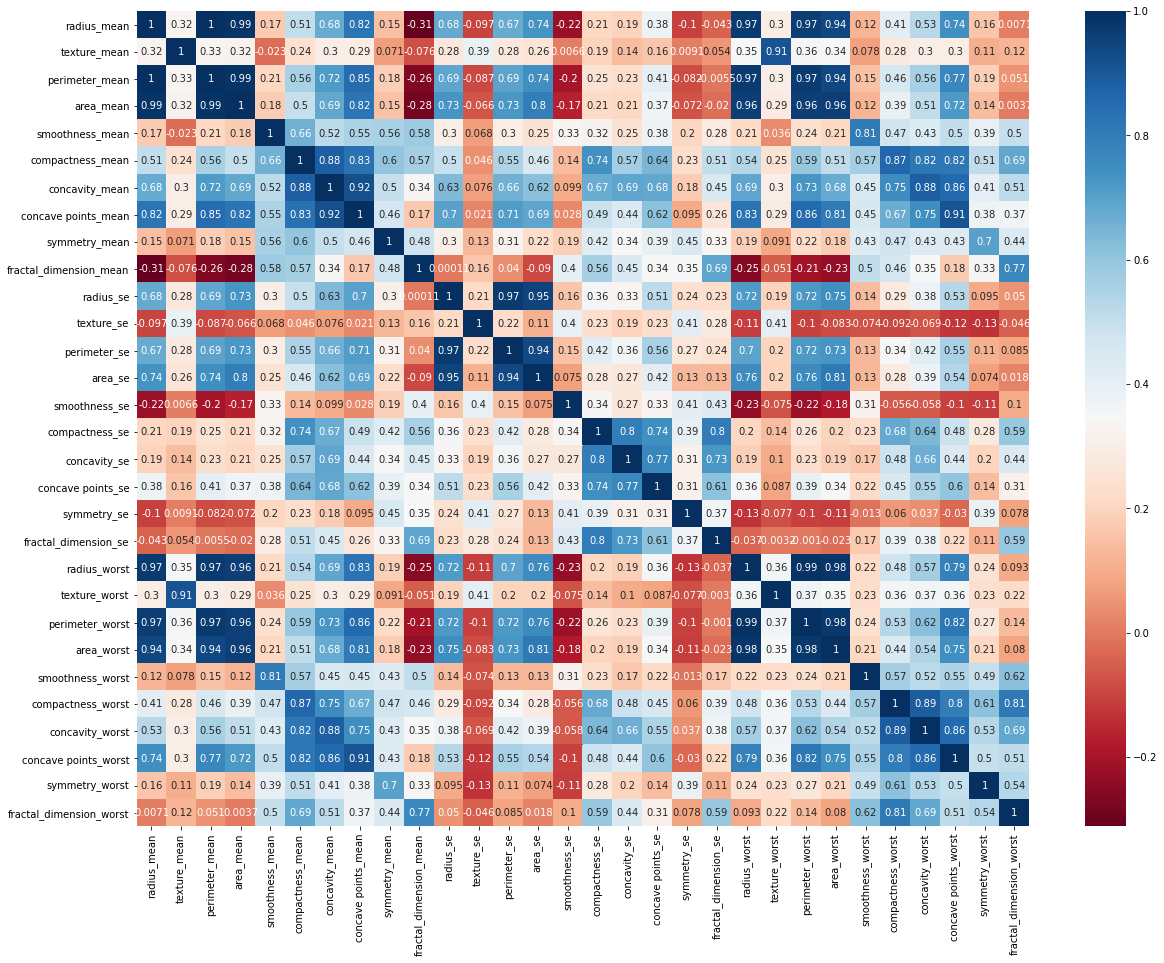

In [9]:
# Plotting correlation matrix as a heatmap:
# The heatmap illustrates the correlation between each feature one by one. 
# Itcontains 900 (30 feature x 30 feature) relationships to indicate the relationship within all features.
# Darker blue colors represent that there was a clear and positive correlation between those features, 
# while lighter blue colors show weak positive correlation, and uncorrelated for benign breast mass. 
# Darker red colors represent that there was a clear and negative relationship between 
# those features, while lighter redcolors show weak negative to weak positive correlation between features. 
# Forinstance,radius mean and perimeter means had a strong and positive correlation with a 1.0 coeﬃcient value. 
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix ,annot=True, cmap = "RdBu")

In [10]:
# standardizing the data so that each of them has a mean of 0 and standard deviation of 1
# standardisation is required because some of the features in the dataset have higher numerical integer values, 
# whereas some of them have much lower numerical values, therefore plotting charts and relations among 
# features with raw values would not give adequate outcomes

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_for_corr = scaler.fit_transform(data_for_corr)
scaled_data_for_corr

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [11]:
# converting scaled_data_for_corr from 2-D array to dataframe
scaled_data_for_corr_df = pd.DataFrame(scaled_data_for_corr, columns = data_for_corr.columns)
scaled_data_for_corr_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [12]:
# preparing our scaled dataset for creating grouped boxplot
# concatenating scaled_data_for_corr_df and the diagnosis column from our raw data to generate the dataframe named as
# boxplot_data that can be used for creating grouped boxplot after some modification
boxplot_data = pd.concat([scaled_data_for_corr_df, data.diagnosis], axis = 'columns')
boxplot_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,M
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,M
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,M
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,M
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,M


In [13]:
# melting our boxplot_data dataframe
# in the process of melting we convert the entire boxplot_data dataframe to a dataframe with only 3 columns
# names as diagnosis, Features and Values
# We are actually grouping each feature according to bening and malignant diagnosis
# Therefore in Features column, we will have rows, showing the feature name (e.g. radius_mean) continuously
# one after the other, first for the rows which had diagnosis as 'M' malignant and then for the rows
# which had diagnosis as 'B' benign along with the respective values of the feature (e.g. radius_mean) itself
melted_data = pd.melt(boxplot_data, ['diagnosis'], var_name="Features", value_name="Values")
melted_data.head()

,diagnosis,Features,Values
0,M,radius_mean,1.097064
1,M,radius_mean,1.829821
2,M,radius_mean,1.579888
3,M,radius_mean,-0.768909
4,M,radius_mean,1.750297


[Text(0, 0, 'radius_mean'),
 Text(0, 0, 'texture_mean'),
 Text(0, 0, 'perimeter_mean'),
 Text(0, 0, 'area_mean'),
 Text(0, 0, 'smoothness_mean'),
 Text(0, 0, 'compactness_mean'),
 Text(0, 0, 'concavity_mean'),
 Text(0, 0, 'concave points_mean'),
 Text(0, 0, 'symmetry_mean'),
 Text(0, 0, 'fractal_dimension_mean'),
 Text(0, 0, 'radius_se'),
 Text(0, 0, 'texture_se'),
 Text(0, 0, 'perimeter_se'),
 Text(0, 0, 'area_se'),
 Text(0, 0, 'smoothness_se'),
 Text(0, 0, 'compactness_se'),
 Text(0, 0, 'concavity_se'),
 Text(0, 0, 'concave points_se'),
 Text(0, 0, 'symmetry_se'),
 Text(0, 0, 'fractal_dimension_se'),
 Text(0, 0, 'radius_worst'),
 Text(0, 0, 'texture_worst'),
 Text(0, 0, 'perimeter_worst'),
 Text(0, 0, 'area_worst'),
 Text(0, 0, 'smoothness_worst'),
 Text(0, 0, 'compactness_worst'),
 Text(0, 0, 'concavity_worst'),
 Text(0, 0, 'concave points_worst'),
 Text(0, 0, 'symmetry_worst'),
 Text(0, 0, 'fractal_dimension_worst')]

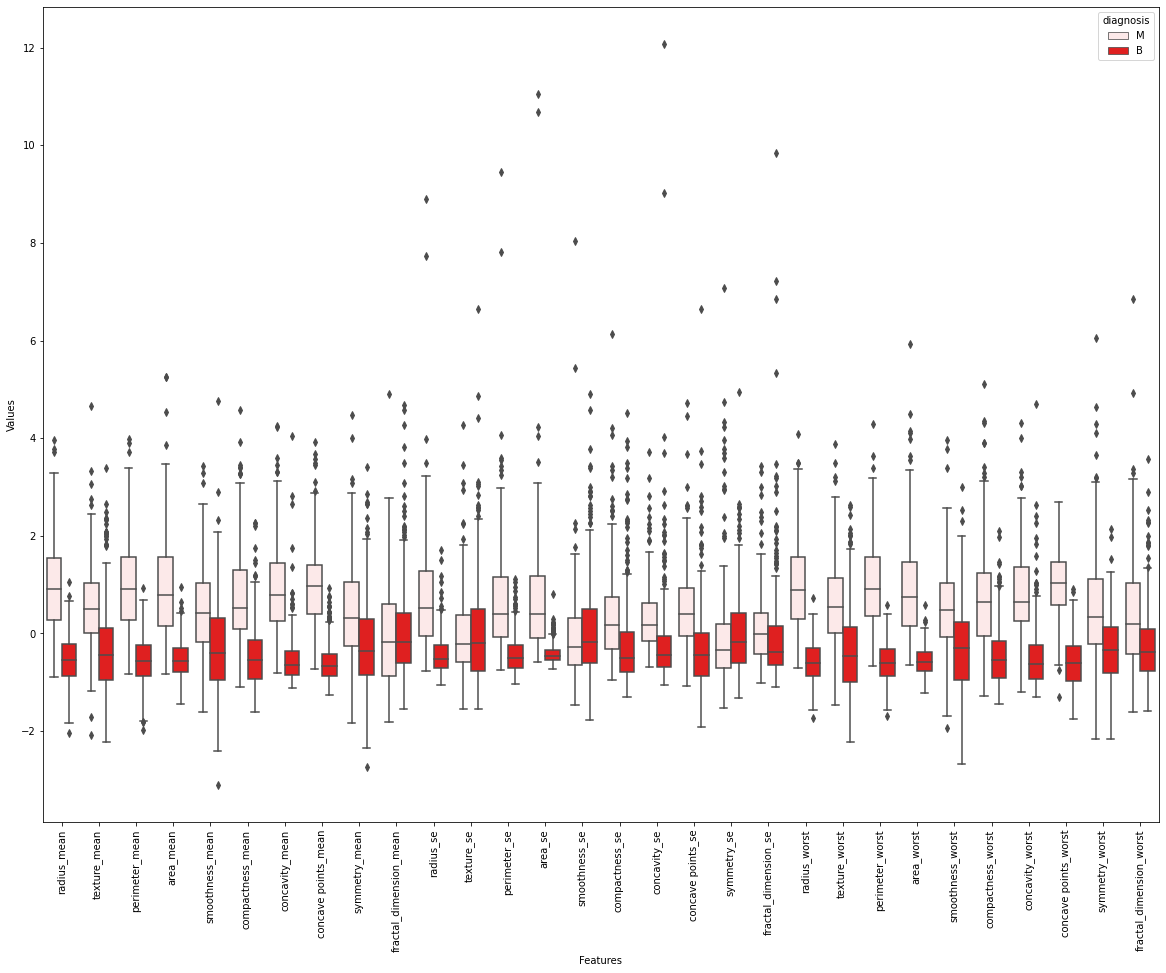

In [14]:
# Plotting a grouped boxplot:
# After normalizing the numerical values of features, a box plot was created for cleaning the data
# Boxplots were created to give insight into the basic statistics of the data and outliers. 
# Tumor types were divided into their labels, and boxplots were constructed foreach feature. 
# According to the boxplot results, features that could classify tumor types better were selected for further analysis
# But according to the boxplot results, some features were excluded since there were too many outliers. 
# This means suﬃciency was lacking to use these features while classifying by looking at the boxplot.
plt.subplots(figsize=(20,15)) # setting the figure size
ax = sns.boxplot(x='Features', y='Values', hue='diagnosis', data = melted_data, color = 'red')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) # making the xtick labels vertical so they dont overlap

In [15]:
# Extracting the positively correlated and negatively correlated featue pairs from the corr_matrix
positively_correlated = {}
negatively_correlated = {}
for row in corr_matrix.columns:
    for col in corr_matrix.columns:
        if row == col:
            continue
        elif (col,row) in positively_correlated.keys() or (col,row) in negatively_correlated.keys():
            continue
        else:
            corr_coeff = corr_matrix.loc[row,col]
            if corr_coeff >= 0.60:
                positively_correlated[(row,col)] = corr_coeff
            elif corr_coeff < -0.05:
                negatively_correlated[(row,col)] = corr_coeff

In [16]:
positively_correlated

{('radius_mean', 'perimeter_mean'): 0.9978552814938113,
 ('radius_mean', 'area_mean'): 0.9873571700566119,
 ('radius_mean', 'concavity_mean'): 0.6767635503908116,
 ('radius_mean', 'concave points_mean'): 0.8225285223871791,
 ('radius_mean', 'radius_se'): 0.6790903880020752,
 ('radius_mean', 'perimeter_se'): 0.6741716157641062,
 ('radius_mean', 'area_se'): 0.7358636632128175,
 ('radius_mean', 'radius_worst'): 0.9695389726112053,
 ('radius_mean', 'perimeter_worst'): 0.9651365139559878,
 ('radius_mean', 'area_worst'): 0.9410824595860459,
 ('radius_mean', 'concave points_worst'): 0.7442141978674656,
 ('texture_mean', 'texture_worst'): 0.9120445888404215,
 ('perimeter_mean', 'area_mean'): 0.9865068039913906,
 ('perimeter_mean', 'concavity_mean'): 0.7161356501174044,
 ('perimeter_mean', 'concave points_mean'): 0.8509770412528199,
 ('perimeter_mean', 'radius_se'): 0.6917650135334821,
 ('perimeter_mean', 'perimeter_se'): 0.693134889540866,
 ('perimeter_mean', 'area_se'): 0.7449826941190679,
 (

In [17]:
negatively_correlated

{('radius_mean', 'fractal_dimension_mean'): -0.3116308263092901,
 ('radius_mean', 'texture_se'): -0.09731744314481341,
 ('radius_mean', 'smoothness_se'): -0.22260012458211118,
 ('radius_mean', 'symmetry_se'): -0.10432088141786555,
 ('texture_mean', 'fractal_dimension_mean'): -0.07643718344813386,
 ('perimeter_mean', 'fractal_dimension_mean'): -0.2614769080663339,
 ('perimeter_mean', 'texture_se'): -0.08676107831179487,
 ('perimeter_mean', 'smoothness_se'): -0.2026940262983221,
 ('perimeter_mean', 'symmetry_se'): -0.08162932702839946,
 ('area_mean', 'fractal_dimension_mean'): -0.2831098116914262,
 ('area_mean', 'texture_se'): -0.06628021360457748,
 ('area_mean', 'smoothness_se'): -0.16677666660111248,
 ('area_mean', 'symmetry_se'): -0.07249658821176269,
 ('fractal_dimension_mean', 'area_se'): -0.09017024752042735,
 ('fractal_dimension_mean', 'radius_worst'): -0.2536914948766099,
 ('fractal_dimension_mean', 'texture_worst'): -0.05126920203676508,
 ('fractal_dimension_mean', 'perimeter_wo

In [18]:
# after feature elimination the features selected as 
# 1.) postively correlated are:
        # radius mean, concavity mean, concave points mean, perimeter worst, area worst, and compactness worst
# 2.) negatively correlated are:
        #smoothness mean, texture mean, radius mean, fractal dimension mean, 
        # texture worst, symmetry se, symmetry mean, area mean
 
# Creating a dataframe with only positive and negative correlated featured (i.e. features that had correlation)
positively_correlated_features = boxplot_data[['radius_mean', 'concavity_mean', 'concave points_mean', 
                                               'perimeter_worst', 'area_worst', 'compactness_worst']]

negatively_correlated_features = boxplot_data[['smoothness_mean', 'texture_mean', 'radius_mean',
                                                          'fractal_dimension_mean', 'texture_worst', 'symmetry_se',
                                                          'symmetry_mean', 'area_mean']]

# Scatter plots for highly and moderately positively correlated features

Correlation coefficient:  0.6767635503908116


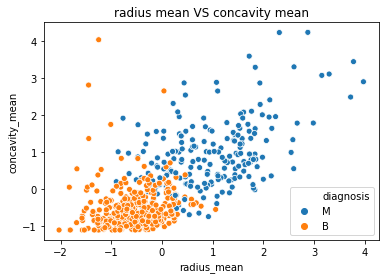

In [19]:
sns.scatterplot(data = boxplot_data, x="radius_mean", y="concavity_mean", hue = 'diagnosis')
plt.title('radius mean VS concavity mean')
print('Correlation coefficient: ',corr_matrix.loc['radius_mean','concavity_mean'])

Correlation coefficient:  0.8225285223871791


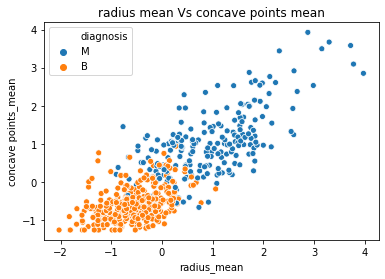

In [20]:
sns.scatterplot(data = boxplot_data, x="radius_mean", y="concave points_mean", hue = 'diagnosis')
plt.title('radius mean Vs concave points mean')
print('Correlation coefficient: ',corr_matrix.loc['radius_mean','concave points_mean'])

Correlation coefficient:  0.9651365139559878


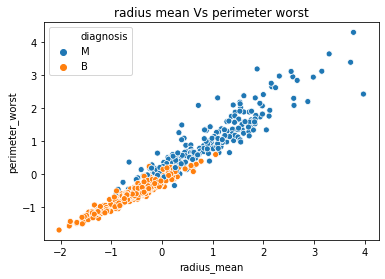

In [21]:
sns.scatterplot(data = boxplot_data, x="radius_mean", y="perimeter_worst", hue = 'diagnosis')
plt.title('radius mean Vs perimeter worst')
print('Correlation coefficient: ',corr_matrix.loc['radius_mean','perimeter_worst'])

Correlation coefficient:  0.9410824595860459


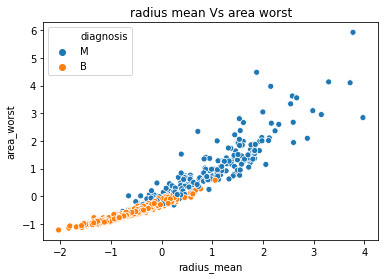

In [22]:
sns.scatterplot(data = boxplot_data, x="radius_mean", y="area_worst", hue = 'diagnosis')
plt.title('radius mean Vs area worst')
print('Correlation coefficient: ',corr_matrix.loc['radius_mean','area_worst'])

Correlation coefficient:  0.49850168215241164


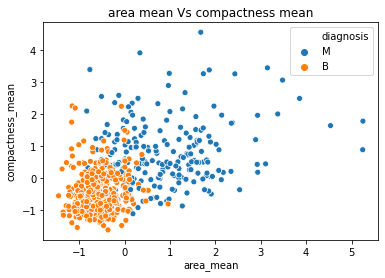

In [23]:
sns.scatterplot(data = boxplot_data, x="area_mean", y="compactness_mean", hue = 'diagnosis')
plt.title('area mean Vs compactness mean')
print('Correlation coefficient: ',corr_matrix.loc['area_mean','compactness_mean'])

Correlation coefficient:  0.6882364076436723


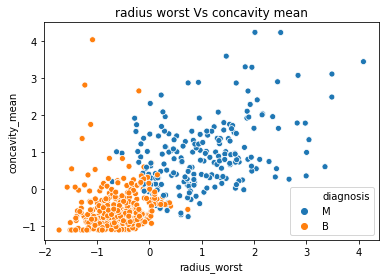

In [24]:
sns.scatterplot(data = boxplot_data, x="radius_worst", y="concavity_mean", hue = 'diagnosis')
plt.title('radius worst Vs concavity mean')
print('Correlation coefficient: ',corr_matrix.loc['radius_worst','concavity_mean'])

# Scatter plot for negatively and non correlated features

Correlation coefficient:  -0.02338851599842355


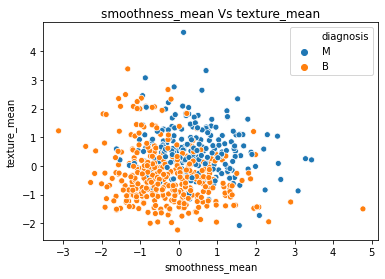

In [25]:
sns.scatterplot(data = boxplot_data, x="smoothness_mean", y="texture_mean", hue = 'diagnosis')
plt.title('smoothness_mean Vs texture_mean')
print('Correlation coefficient: ',corr_matrix.loc['smoothness_mean','texture_mean'])

Correlation coefficient:  -0.3116308263092901


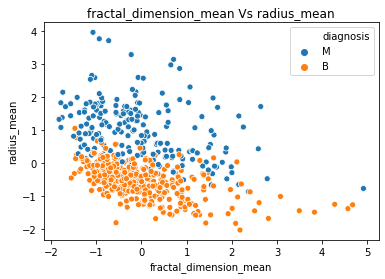

In [26]:
sns.scatterplot(data = boxplot_data, x="fractal_dimension_mean", y="radius_mean", hue = 'diagnosis')
plt.title('fractal_dimension_mean Vs radius_mean')
print('Correlation coefficient: ',corr_matrix.loc['fractal_dimension_mean','radius_mean'])

Correlation coefficient:  -0.2831098116914262


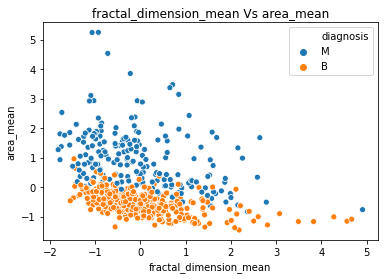

In [27]:
sns.scatterplot(data = boxplot_data, x="fractal_dimension_mean", y="area_mean", hue = 'diagnosis')
plt.title('fractal_dimension_mean Vs area_mean')
print('Correlation coefficient: ',corr_matrix.loc['fractal_dimension_mean','area_mean'])

Correlation coefficient:  -0.16677666660111248


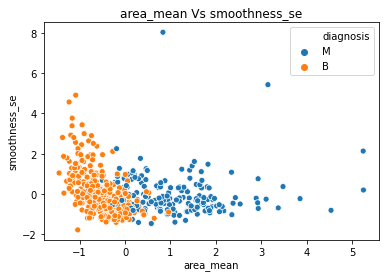

In [28]:
sns.scatterplot(data = boxplot_data, x="area_mean", y="smoothness_se", hue = 'diagnosis')
plt.title('area_mean Vs smoothness_se')
print('Correlation coefficient: ',corr_matrix.loc['area_mean','smoothness_se'])

Correlation coefficient:  -0.2026940262983221


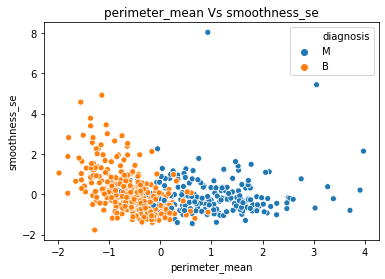

In [29]:
sns.scatterplot(data = boxplot_data, x="perimeter_mean", y="smoothness_se", hue = 'diagnosis')
plt.title('perimeter_mean Vs smoothness_se')
print('Correlation coefficient: ',corr_matrix.loc['perimeter_mean','smoothness_se'])

Correlation coefficient:  0.007065885692182505


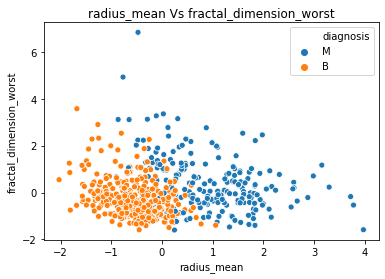

In [30]:
sns.scatterplot(data = boxplot_data, x="radius_mean", y="fractal_dimension_worst", hue = 'diagnosis')
plt.title('radius_mean Vs fractal_dimension_worst')
print('Correlation coefficient: ',corr_matrix.loc['radius_mean','fractal_dimension_worst'])

Correlation coefficient:  0.0906506881166427


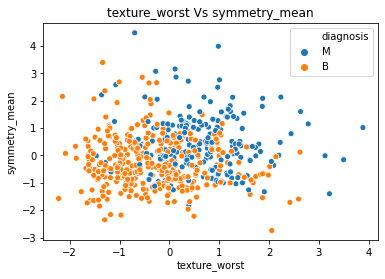

In [31]:
sns.scatterplot(data = boxplot_data, x="texture_worst", y="symmetry_mean", hue = 'diagnosis')
plt.title('texture_worst Vs symmetry_mean')
print('Correlation coefficient: ',corr_matrix.loc['texture_worst','symmetry_mean'])

Correlation coefficient:  0.009127167755036037


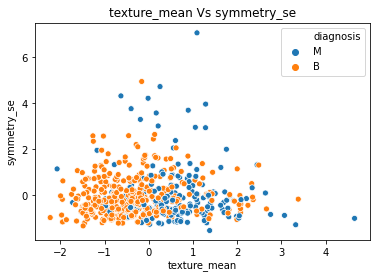

In [32]:
sns.scatterplot(data = boxplot_data, x="texture_mean", y="symmetry_se", hue = 'diagnosis')
plt.title('texture_mean Vs symmetry_se')
print('Correlation coefficient: ',corr_matrix.loc['texture_mean','symmetry_se'])

Correlation coefficient:  0.1512930790351123


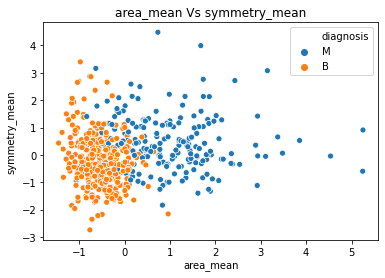

In [33]:
sns.scatterplot(data = boxplot_data, x="area_mean", y="symmetry_mean", hue = 'diagnosis')
plt.title('area_mean Vs symmetry_mean')
print('Correlation coefficient: ',corr_matrix.loc['area_mean','symmetry_mean'])

Correlation coefficient:  0.1770283772540013


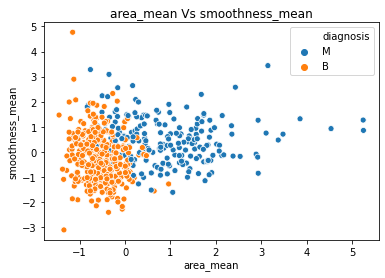

In [54]:
sns.scatterplot(data = boxplot_data, x="area_mean", y="smoothness_mean", hue = 'diagnosis')
plt.title('area_mean Vs smoothness_mean')
print('Correlation coefficient: ',corr_matrix.loc['area_mean','smoothness_mean'])

# Applying ML algorithms

In [35]:
# First the dataset has to be divided into 3 parts
# 1.) had all features
# 2.) highly correlated features
# 3.) low correlated features

dataset_1 = boxplot_data
dataset_2 = pd.concat([positively_correlated_features, negatively_correlated_features], axis = 1)
dataset_2['diagnosis'] = boxplot_data.diagnosis
#dataset_3 = boxplot_data[['area_mean', 'smoothness_mean', 'symmetry_mean', 'symmetry_se', 
 #                         'texture_mean', 'texture_worst', 'radius_mean', 'fractal_dimension_worst','diagnosis']]
dataset_3 = boxplot_data.drop(dataset_2.columns, axis=1)
dataset_3['diagnosis'] = boxplot_data.diagnosis

# 1.) Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# for first dataset
x = dataset_1.drop('diagnosis',axis = 1)
y = dataset_1.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain)
log_reg_score_1 = log_reg.score(xtest, ytest)
log_reg_score_1

0.9736842105263158

In [37]:
# for second dataset
x = dataset_2.drop('diagnosis',axis = 1)
y = dataset_2.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain)
log_reg_score_2 = log_reg.score(xtest, ytest)
log_reg_score_2

0.9649122807017544

In [38]:
# for third dataset
x = dataset_3.drop('diagnosis',axis = 1)
y = dataset_3.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain)
log_reg_score_3 = log_reg.score(xtest, ytest)
log_reg_score_3

0.9824561403508771

# 2.) KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# 1.) for first dataset
x = dataset_1.drop('diagnosis',axis = 1)
y = dataset_1.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors = 10)
  
knn.fit(xtrain, ytrain)
knn_score_1 = knn.score(xtest, ytest)
knn_score_1

0.956140350877193

In [40]:
# 2.) for second dataset
x = dataset_2.drop('diagnosis',axis = 1)
y = dataset_2.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors = 12)
  
knn.fit(xtrain, ytrain)
knn_score_2 = knn.score(xtest, ytest)
knn_score_2

0.956140350877193

In [41]:
# 3.) for third dataset
x = dataset_3.drop('diagnosis',axis = 1)
y = dataset_3.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors = 10)
  
knn.fit(xtrain, ytrain)
knn_score_3 = knn.score(xtest, ytest)
knn_score_3

0.9385964912280702

# 3.) SVM

In [42]:
from sklearn.svm import SVC  

# 1.) for first dataset
x = dataset_1.drop('diagnosis',axis = 1)
y = dataset_1.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=1)

svm = SVC() 

svm.fit(xtrain, ytrain)
svm_score_1 = svm.score(xtest, ytest)
svm_score_1

0.9736842105263158

In [43]:
# 2.) for second dataset
x = dataset_2.drop('diagnosis',axis = 1)
y = dataset_2.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=1)

svm = SVC() 

svm.fit(xtrain, ytrain)
svm_score_2 = svm.score(xtest, ytest)
svm_score_2

0.9736842105263158

In [44]:
# 3.) for third dataset
x = dataset_3.drop('diagnosis',axis = 1)
y = dataset_3.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=1)

svm = SVC() 

svm.fit(xtrain, ytrain)
svm_score_3 = svm.score(xtest, ytest)
svm_score_3

0.9385964912280702

# 4.) Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

# 1.) for first dataset
x = dataset_1.drop('diagnosis',axis = 1)
y = dataset_1.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=1)

nb = GaussianNB()

nb.fit(xtrain, ytrain)
nb_score_1 = nb.score(xtest, ytest)
nb_score_1

0.9473684210526315

In [46]:
# 2.) for second dataset
x = dataset_2.drop('diagnosis',axis = 1)
y = dataset_2.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=1)

nb = GaussianNB()

nb.fit(xtrain, ytrain)
nb_score_2 = nb.score(xtest, ytest)
nb_score_2

0.9385964912280702

In [47]:
# 3.) for third dataset
x = dataset_3.drop('diagnosis',axis = 1)
y = dataset_3.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=1)

nb = GaussianNB()

nb.fit(xtrain, ytrain)
nb_score_3 = nb.score(xtest, ytest)
nb_score_3

0.9385964912280702

# 4.) Random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

# 1.) for first dataset
x = dataset_1.drop('diagnosis',axis = 1)
y = dataset_1.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

rf = RandomForestClassifier(n_estimators = 50) 

rf.fit(xtrain, ytrain)
rf_score_1 = rf.score(xtest, ytest)
rf_score_1

0.956140350877193

In [49]:
# 2.) for second dataset
x = dataset_2.drop('diagnosis',axis = 1)
y = dataset_2.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

rf = RandomForestClassifier(n_estimators = 50) 

rf.fit(xtrain, ytrain)
rf_score_2 = rf.score(xtest, ytest)
rf_score_2

0.9736842105263158

In [50]:
# 3.) for third dataset
x = dataset_3.drop('diagnosis',axis = 1)
y = dataset_3.diagnosis
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

rf = RandomForestClassifier(n_estimators = 50) 

rf.fit(xtrain, ytrain)
rf_score_3 = rf.score(xtest, ytest)
rf_score_3

0.9473684210526315

In [51]:
# Plotting the accuracy values for all the algortihms
barplot_data = pd.DataFrame({'Logistic Regression':[log_reg_score_1, log_reg_score_2, log_reg_score_3], 
                             'KNN':[knn_score_1, knn_score_2, knn_score_3],
                             'SVM':[svm_score_1, svm_score_2, svm_score_3],
                             'Naive Bayes':[nb_score_1, nb_score_2, nb_score_3],
                             'Random Forest':[rf_score_1, rf_score_2, rf_score_3]})
barplot_data

,Logistic Regression,KNN,SVM,Naive Bayes,Random Forest
0,0.973684,0.956140,0.973684,0.947368,0.956140
1,0.964912,0.956140,0.973684,0.938596,0.973684
2,0.982456,0.938596,0.938596,0.938596,0.947368


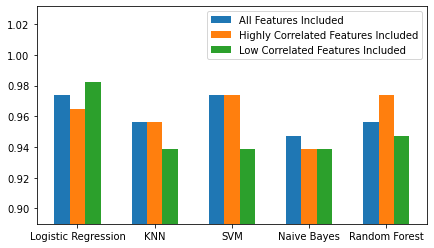

In [52]:
import numpy as np
x = np.arange(5)
w = 0.2
plt.subplots(figsize=(7,4))
plt.bar(x-w,barplot_data.iloc[0], width = w, label = 'All Features Included')
plt.bar(x,barplot_data.iloc[1], width = w, label = 'Highly Correlated Features Included')
plt.bar(x+w,barplot_data.iloc[2], width = w, label = 'Low Correlated Features Included')
plt.xticks(x,barplot_data.columns)
plt.ylim(ymin=0.89) 
plt.legend()